# Group Project / Assignment 4: Instruction finetuning a Llama-3.2 model
**Assignment due 21 April 11:59pm**

Welcome to the fourth and final assignment for 50.055 Machine Learning Operations. The third and fourth assignment together form the course group project. You will continue the work on a chatbot which can answer questions about SUTD to prospective students.


**This assignment is a group assignment.**

- Read the instructions in this notebook carefully
- Add your solution code and answers in the appropriate places. The questions are marked as **QUESTION:**, the places where you need to add your code and text answers are marked as **ADD YOUR SOLUTION HERE**. The assignment is more open-ended than previous assignments, i.e. you have more freedom how to solve the problem and how to structure your code.
- The completed notebook, including your added code and generated output will be your submission for the assignment.
- The notebook should execute without errors from start to finish when you select "Restart Kernel and Run All Cells..". Please test this before submission.
- Use the SUTD Education Cluster to solve and test the assignment. If you work on another environment, minimally test your work on the SUTD Education Cluster.

**Rubric for assessment**

Your submission will be graded using the following criteria.
1. Code executes: your code should execute without errors. The SUTD Education cluster should be used to ensure the same execution environment.
2. Correctness: the code should produce the correct result or the text answer should state the factual correct answer.
3. Style: your code should be written in a way that is clean and efficient. Your text answers should be relevant, concise and easy to understand.
4. Partial marks will be awarded for partially correct solutions.
5. Creativity and innovation: in this assignment you have more freedom to design your solution, compared to the first assignments. You can show of your creativity and innovative mindset.
6. There is a maximum of 310 points for this assignment.

**ChatGPT policy**

If you use AI tools, such as ChatGPT, to solve the assignment questions, you need to be transparent about its use and mark AI-generated content as such. In particular, you should include the following in addition to your final answer:
- A copy or screenshot of the prompt you used
- The name of the AI model
- The AI generated output
- An explanation why the answer is correct or what you had to change to arrive at the correct answer

**Assignment Notes:** Please make sure to save the notebook as you go along. Submission Instructions are located at the bottom of the notebook.



### Finetuning LLMs

The goal of the assignment is to build a more advanced chatbot that can talk to prospective students and answer questions about SUTD.

We will finetune a smaller 1B LLM on question-answer pairs which we synthetically generate. Then we will compare the finetuned and non-finetuned LLMs with and without RAG to see if we were able to improve the SUTD chatbot answer quality.

We'll be leveraging `langchain`, `llama 3.2` and `Google AI STudio with Gemini 2.0`.

Check out the docs:
- [LangChain](https://docs.langchain.com/docs/)
- [Llama 3.2](https://www.llama.com/docs/model-cards-and-prompt-formats/llama3_2/)
- [Google AI Studio](https://aistudio.google.com/)

Note: Google AI Studio provides a lot of free tokens but has certain rate limits. Write your code in a way that it can handle these limits.

# Install dependencies
Use pip to install all required dependencies of this assignment in the cell below. Make sure to test this on the SUTD cluster as different environments have different software pre-installed.  

In [1]:
# QUESTION: Install and import all required packages
# The rest of your code should execute without any import or dependency errors.

# **--- ADD YOUR SOLUTION HERE (10 points) ---**
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install transformers
!pip install datasets
!pip install accelerate
!pip install huggingface_hub
!pip install langchain langchain-core langchain-community langchain-experimental langchain-google-genai langchain_openai
!pip install google-generativeai
!pip install flashrank
!pip install openai
!pip install sentence-transformers
!pip install dotenv
!pip install pydantic
!pip install unsloth
!pip install accelerate
!pip install peft
!pip uninstall trl -y && pip install --no-cache-dir --force-reinstall --no-deps "trl<0.15.0"
!pip install bitsandbytes
!pip install faiss-cpu
!pip install gradio
!pip install scikit-learn
!pip install evaluate
!pip install matplotlib

Looking in indexes: https://download.pytorch.org/whl/cu118
  Using cached https://download.pytorch.org/whl/cu118/torch-2.6.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata (28 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchvision-0.21.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata (6.3 kB)
  Using cached https://download.pytorch.org/whl/cu118/torchaudio-2.6.0%2Bcu118-cp311-cp311-win_amd64.whl.metadata (6.8 kB)
  Using cached https://download.pytorch.org/whl/filelock-3.13.1-py3-none-any.whl.metadata (2.8 kB)
  Using cached https://download.pytorch.org/whl/networkx-3.3-py3-none-any.whl.metadata (5.1 kB)
  Using cached https://download.pytorch.org/whl/Jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached https://download.pytorch.org/whl/fsspec-2024.6.1-py3-none-any.whl.metadata (11 kB)
  Using cached https://download.pytorch.org/whl/sympy-1.13.1-py3-none-any.whl (6.2 MB)
  Using cached https://download.pytorch.org/whl/mpmath-1.3.0-py3-none-any.whl (536 kB)
  Using cache

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 2.1.3 requires google-ai-generativelanguage<0.7.0,>=0.6.16, but you have google-ai-generativelanguage 0.6.15 which is incompatible.


  Using cached FlashRank-0.2.10-py3-none-any.whl.metadata (14 kB)
  Using cached onnxruntime-1.21.1-cp311-cp311-win_amd64.whl.metadata (4.9 kB)
  Using cached coloredlogs-15.0.1-py2.py3-none-any.whl.metadata (12 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached humanfriendly-10.0-py2.py3-none-any.whl.metadata (9.2 kB)
  Using cached pyreadline3-3.5.4-py3-none-any.whl.metadata (4.7 kB)
Using cached FlashRank-0.2.10-py3-none-any.whl (14 kB)
Using cached onnxruntime-1.21.1-cp311-cp311-win_amd64.whl (12.3 MB)
Using cached coloredlogs-15.0.1-py2.py3-none-any.whl (46 kB)
Using cached flatbuffers-25.2.10-py2.py3-none-any.whl (30 kB)
Using cached humanfriendly-10.0-py2.py3-none-any.whl (86 kB)
Using cached pyreadline3-3.5.4-py3-none-any.whl (83 kB)
  Using cached sentence_transformers-4.1.0-py3-none-any.whl.metadata (13 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.2-cp311-cp311-win_amd64

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.
langchain-google-genai 2.1.3 requires google-ai-generativelanguage<0.7.0,>=0.6.16, but you have google-ai-generativelanguage 0.6.15 which is incompatible.


Found existing installation: trl 0.15.2
Uninstalling trl-0.15.2:
  Successfully uninstalled trl-0.15.2
  Using cached faiss_cpu-1.10.0-cp311-cp311-win_amd64.whl.metadata (4.5 kB)
Using cached faiss_cpu-1.10.0-cp311-cp311-win_amd64.whl (13.7 MB)
  Using cached gradio-5.25.2-py3-none-any.whl.metadata (16 kB)
  Using cached aiofiles-24.1.0-py3-none-any.whl.metadata (10 kB)
  Using cached fastapi-0.115.12-py3-none-any.whl.metadata (27 kB)
  Using cached ffmpy-0.5.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached gradio_client-1.8.0-py3-none-any.whl.metadata (7.1 kB)
  Using cached groovy-0.1.2-py3-none-any.whl.metadata (6.1 kB)
  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached python_multipart-0.0.20-py3-none-any.whl.metadata (1.8 kB)
  Using cached ruff-0.11.6-py3-none-win_amd64.whl.metadata (26 kB)
  Using cached safehttpx-0.1.6-py3-none-any.whl.metadata (4.2 kB)
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl.metadata (9.7 kB)
  Using cached

# Importing libraries

In [3]:

# finetuning imports
import unsloth
from dotenv import load_dotenv
from langchain_google_genai import ChatGoogleGenerativeAI

# TODO: check the difference between ChatGoogleGenerativeAI and GoogleGenerativeAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline
from langchain import PromptTemplate, LLMChain
from langchain_core.pydantic_v1 import BaseModel, Field
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from datasets import load_dataset
from huggingface_hub import login
from transformers import pipeline, TrainingArguments
from trl import SFTTrainer
from unsloth import FastLanguageModel
from unsloth import is_bfloat16_supported
from unsloth import to_sharegpt, standardize_sharegpt
from peft import PeftModel
from typing import List, Dict, Literal
import os
from pydantic import BaseModel
import time
import json
import torch, gc
import pandas as pd
import re

#evaluate imports
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import evaluate
import matplotlib.pyplot as plt

# rag imports
from openai import OpenAI
from langchain_openai.embeddings import OpenAIEmbeddings
from langchain_experimental.text_splitter import SemanticChunker
from langchain_community.vectorstores import FAISS
from flashrank import Ranker, RerankRequest
from langchain.retrievers import ContextualCompressionRetriever
from langchain.retrievers.document_compressors import FlashrankRerank
from transformers import pipeline
from langchain.llms import HuggingFacePipeline
from langchain import PromptTemplate, LLMChain
from langchain.chains import RetrievalQA
from sentence_transformers import SentenceTransformer
import gradio as gr

load_dotenv()

GOOGLE_GENAI_API_KEY = os.getenv("GOOGLE_GENAI_API_KEY")
HUGGINGFACE_TOKEN = os.getenv("HUGGINGFACE_TOKEN")
USERNAME = os.getenv("HUGGINGFACE_USERNAME")
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")

# rag imports
MARKDOWN_PATH = "data/markdown/markdown_data.json"
HTML_PATH = "data/html/html_data.json"
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
EMBEDDING_MODEL = "text-embedding-ada-002"
TOP_K = 5
OUTPUT_DIR = "vector_store"
HUGGINGFACE_TOKEN = os.getenv("HUGGINGFACE_TOKEN")
MODEL_DIR = "models"
JSON_PATH = "data/data.json"
client = OpenAI(api_key=OPENAI_API_KEY)

login(token=HUGGINGFACE_TOKEN)

# Generate training data
The first step of the assignment is generating synthetic question-answer pairs which can be used for finetuning an LLM model.
Use the Google AI studio with the Gemini models to create -high-quality QA training data.


In [ ]:
# QUESTION: Use langchain and the Google AI Studio APIs and a model from the Gemini 2.0 family
# to create a text-generation chain that can produce and parse JSON output.
# Test it by having the LLM generate a JSON array of 3 fruits

#--- ADD YOUR SOLUTION HERE (20 points)---

# --------------------------------------------------------------------------------

# we are creating synthetic data that contains only questions and responses but not on multiple tasks, because this is a chatbot application
model = ChatGoogleGenerativeAI(google_api_key=GOOGLE_GENAI_API_KEY, model="gemini-2.0-flash", temperature=0.2, convert_system_message_to_human=True)
parser = JsonOutputParser()
input_prompt = "Generate a JSON array containing exactly 3 fruit names."
prompt = ChatPromptTemplate.from_messages([
    ("system", """
    You are a helpful assistant that generates structured JSON data.
    Your response should ONLY contain valid JSON without any additional text.
    Do not include explanation, notes, or markdown formatting.
    """),
    ("human", "{input_text}")
])
chain = ( prompt | model | parser )
response = chain.invoke({"input_text": input_prompt})
print(response)

# --------------------------------------------------------------------------------

# imo there is a better way to do this which is using pydantic and langchain
class FruitList(BaseModel):
    fruits: List[str] = Field(description="A list of fruit objects", min_length=3, max_length=3)

pydantic_parser = JsonOutputParser(pydantic_object=FruitList)
prompt = PromptTemplate(
    template  = "Answer the user's question.\n\n{format_instructions}\n\n{input}",
    input_variables = ["input"],
    partial_variables={"format_instructions": parser.get_format_instructions()},
)

chain = ( prompt | model | pydantic_parser )
response = chain.invoke({"input": input_prompt})
print(response)

/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


['apple', 'banana', 'orange']


/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


['apple', 'banana', 'orange']


## Generate topics
When generating data, it is often helpful to guide the generation process through some hierachical structure.
Before we create question-answer pairs, let's generate some topics which the questions should be about.



In [ ]:
# QUESTION: Create a function 'generate_topics' which generates topics which prospective students might care about.
#
# Generate a list of 20 topics

#--- ADD YOUR SOLUTION HERE (20 points)---
def generate_topics(num = 20):
    class TopicsList(BaseModel):
        topics: List[str] = Field(description=f"A list of {num} topics that prospective students might care about", min_length=num, max_length=num)

    # if the file already exists don't run instead return the topics from the file
    output_dir = "data"

    if os.path.exists(output_dir) == False:
        os.makedirs(output_dir)

    filename = f"data/topics.json"

    model = ChatGoogleGenerativeAI(
        google_api_key=GOOGLE_GENAI_API_KEY,
        model="gemini-2.0-flash",
        temperature=0.8, # using this value for more diverse topics
        convert_system_message_to_human=True #the system message is reformatted or “converted” into a style that resembles the way a human would pose a question or comment
    )

    pydantic_parser = JsonOutputParser(pydantic_object=TopicsList)
    pydantic_parser = JsonOutputParser(pydantic_object=TopicsList)

    prompt = PromptTemplate(
        template=(
            "List out topics a prospective student might be interested in when "
            "Think of real concerns such as academic quality, campus life, tuition, "
            "social environment, and career opportunities.\n\n"
            "{format_instructions}\n\n"
            "{input}"
        ),
        input_variables=["input"],
        partial_variables={"format_instructions": pydantic_parser.get_format_instructions()},
    )
    input_prompt = (
        f"Please list exactly {num} topics that capture what prospective students care about "
        "when choosing a university like SUTD."
    )

    chain = prompt | model | parser
    response = chain.invoke({"input": input_prompt})

    topics = response["topics"]

    # save to disk otherwise
    with open(filename, 'w') as file:
        json.dump(topics, file)

    return topics

In [ ]:
# test topic generation
print(generate_topics(3))

/usr/local/lib/python3.11/dist-packages/pydantic/json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 3 topics that prospective students might care about' min_length=3 max_length=3 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
/usr/local/lib/python3.11/dist-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


['Academic Rigor and Curriculum', 'Career Prospects and Industry Connections', 'Campus Culture and Student Life']


In [ ]:
# Generate a list of 20 topics
# We save a copy to disk and reload it from there if the file exists

# the function to generate topics and saves it to disk as topics_20.json
print(generate_topics(20))

c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 20 topics that prospective students might care about' min_length=20 max_length=20 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


['Academic Reputation and Ranking', 'Specific Program Strengths (e.g., Engineering, Design)', 'Faculty Expertise and Research Opportunities', 'Hands-on Learning and Project-Based Curriculum', 'Internship Opportunities and Industry Connections', 'Career Services and Graduate Employment Rate', 'Tuition Fees and Financial Aid Options', 'Scholarship Availability and Eligibility Criteria', 'Cost of Living in Singapore', 'Accommodation Options (on-campus and off-campus)', 'Campus Facilities and Resources (labs, library, maker spaces)', 'Student-Faculty Ratio and Class Sizes', 'Student Support Services (academic advising, counseling)', 'Campus Culture and Student Life', 'Diversity and Inclusion Initiatives', 'Extracurricular Activities and Clubs', 'Location and Accessibility of the University', 'Opportunities for International Exchange Programs', 'Networking Opportunities with Alumni', 'Safety and Security on Campus']


## Generate questions
Now generate a set of questions about each topic

In [ ]:
# QUESTION: Create a function 'generate_questions' which generates quetions about a given topic.
# Generate a list of 10 questions per topics. In total you should have 200 questions.
#

#--- ADD YOUR SOLUTION HERE (20 points)---
# TODO: rememeber to add timeout to the function
def generate_questions(topic, num=10):
    output_dir = "data"

    if os.path.exists(output_dir) == False:
        os.makedirs(output_dir)

    model = ChatGoogleGenerativeAI(
        google_api_key=GOOGLE_GENAI_API_KEY,
        model="gemini-2.0-flash",
        temperature=0.4, # hyperparameter can be changed
        convert_system_message_to_human=True
    )

    class Questions(BaseModel):
        questions: List[str] = Field(
            description=f"A list of {num} questions about a specific topic",
            min_length=num,
            max_length=num
        )

    parser = JsonOutputParser(pydantic_object=Questions)

    # i think the best thing is to avoid specifics to the university to avoid confusion
    prompt = PromptTemplate(
        template=(
            "Imagine you are a prospective university student wanting to know more about a specific aspect. "
            "For the topic provided, generate exactly {num_questions} questions that you might naturally ask. "
            "Topic: {topic}\n\n"
            "{format_instructions}"
        ),
        input_variables=["topic", "num_questions"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
    )
    chain = prompt | model | parser

    questions_data = {}

    try:
        print(f"Generating questions for topic: {topic}")
        response = chain.invoke({"topic": topic, "num_questions": num})
        questions_data[topic] = response["questions"]

    except Exception as e:
        print(f"Error generating questions for topic '{topic}': {e}")

    return questions_data

In [ ]:
# test it
print(generate_questions("Academic Reputation and Program Quality", 3))

c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 3 questions about a specific topic' min_length=3 max_length=3 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Academic Reputation and Program Quality
{'Academic Reputation and Program Quality': ['What specific accreditations does the [Program Name] program hold, and how do these accreditations benefit students?', 'Could you provide data on graduate employment rates and the types of positions graduates typically obtain after completing the [Program Name] program?', 'How does the university ensure the curriculum for the [Program Name] program remains current and relevant to industry trends and advancements?']}


In [ ]:
# # QUESTION: Now let's put it together and generate 10 questions for each topic. Save the questions in a local file.

#--- ADD YOUR SOLUTION HERE (20 points)---
with open("data/topics.json", "r") as f:
    topics = json.load(f)

rate_limit = 15
requests_made = 0
all_questions = {}

for i, topic in enumerate(topics):
    if requests_made >= rate_limit:
        time.sleep(60)
        requests_made = 0
    response = generate_questions(topic)
    all_questions[topic] = response[topic]
    requests_made += 1

with open("data/questions.json", "w") as f:
    json.dump(all_questions, f, indent=2)

c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Academic Reputation and Ranking


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Specific Program Strengths (e.g., Engineering, Design)


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Faculty Expertise and Research Opportunities


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Hands-on Learning and Project-Based Curriculum


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Internship Opportunities and Industry Connections


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Career Services and Graduate Employment Rate


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Tuition Fees and Financial Aid Options


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Scholarship Availability and Eligibility Criteria


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Cost of Living in Singapore


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Accommodation Options (on-campus and off-campus)


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Campus Facilities and Resources (labs, library, maker spaces)


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Student-Faculty Ratio and Class Sizes


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Student Support Services (academic advising, counseling)


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Campus Culture and Student Life


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Diversity and Inclusion Initiatives


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Extracurricular Activities and Clubs


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Location and Accessibility of the University


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Opportunities for International Exchange Programs


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Networking Opportunities with Alumni


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='A list of 10 questions about a specific topic' min_length=10 max_length=10 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Generating questions for topic: Safety and Security on Campus


## Generate Answers

Now create answers for the questions.

You can use the Google AI Studio Gemini model (assuming that they are good enough to generate good answers), your RAG system from assignment 3 or any other method you choose to generate answers for your question dataset.

Note: it is normal that some LLM calls fail, even with retry, so maybe you end up with less than 200 QA pairs but it should be at least 160 QA pairs.

In [ ]:
# QUESTION: Generate answers to al your questions using Gemini, your SUTD RAG system or any other method.
# Split your dataset in to 80% training and 20% test dataset.
# Store all questions and answer pairs in a huggingface dataset `sutd_qa_dataset` and push it to your Huggingface hub.

#--- ADD YOUR SOLUTION HERE (40 points)---

# generate answers to al the questions using Gemini and then split the dataset in to 80% training and 20% test dataset.
def generate_answer(question):
    class Answer(BaseModel):
        answer: str = Field(description="The answer to the question")

    parser = JsonOutputParser(pydantic_object=Answer)
    prompt = PromptTemplate(
        template=(
            "Answer the following question in a friendly, clear, and brief manner, as though you "
            "are advising a prospective student. Use simple language and get straight to the point.\n\n"
            "{format_instructions}\n\n"
            "{question}"
        ),
        input_variables=["question"],
        partial_variables={"format_instructions": parser.get_format_instructions()},
    )

    model = ChatGoogleGenerativeAI(
        google_api_key=GOOGLE_GENAI_API_KEY,
        model="gemini-2.0-flash",
        temperature=0.3,
        convert_system_message_to_human=True
    )
    chain = prompt | model | parser
    return chain.invoke({"question": question})

In [ ]:
# now split the dataset in to 80% training and 20% test dataset

# load the questions from the json
with open("data/questions.json", "r") as f:
    questions_data = json.load(f)

# flattening the questions data with topic as the key
flat_questions = []
for topic, questions in questions_data.items():
    for question in questions:
        flat_questions.append({"topic": topic, "question": question})

questions_df = pd.DataFrame(flat_questions)

# splits
train_df, test_df = train_test_split(questions_df, test_size=0.2, random_state=42)

print(f"Training size: {len(train_df)}")
print(f"Test size: {len(test_df)}")

# save
train_df.to_csv("data/train.csv", index=False)
test_df.to_csv("data/test.csv", index=False)

Training size: 160
Test size: 40


In [ ]:
# test the chain
question = "When was SUTD founded?"

# Now run the answer generation chain
response = generate_answer(question)
print("\nModel Response:")
print(response["answer"])

c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



Model Response:
SUTD was founded in 2009.


In [ ]:
# now run the chain for all questions to collect context and generate answers

# load the questions
def process_dataset(csv_file, output_file):
    # check if the output file already exists to resume from previous run (IT CRASHED)
    try:
        df = pd.read_csv(output_file)
        print(f"Resuming from existing file: {output_file}")
    except FileNotFoundError:
        df = pd.read_csv(csv_file)
        df['answer'] = None  # add empty answer column to be filled in

    requests_made = 0
    rate_limit = 12  # reduced from 15 to 12 to be safer
    count = 0
    total = len(df)
    start_time = time.time()

    # track which rows we've already processed
    processed_rows = 0
    for index, row in df.iterrows():
        # skip rows that already have answers
        if pd.notna(row.get('answer')):
            processed_rows += 1
            continue

        question = row['question']

        # rate limit by time window (60 seconds) and requests made
        current_time = time.time()
        elapsed_time = current_time - start_time
        if requests_made >= rate_limit:
            remaining_time = 60 - elapsed_time
            # if requests made is greater than rate limit, and time has elapsed is greater than 60 seconds, sleep for remaining time
            if remaining_time > 0:
                print(f"Rate limit reached. Sleeping for {remaining_time:.2f} seconds...")
                time.sleep(remaining_time)
            # reset counter and time window
            requests_made = 0
            start_time = time.time()

        # generate answer
        try:
            answer = generate_answer(question=question)
            df.at[index, 'answer'] = answer["answer"]

            # Save progress after each successful answer
            if processed_rows % 5 == 0:  # Save every 5 processed items
                df.to_csv(output_file, index=False)

            count += 1
            requests_made += 1
            processed_rows += 1
            print(f"Processing {csv_file}: {processed_rows}/{total}")

        except Exception as e:
            print(f"Error processing question: {question}")
            print(f"Error: {e}")
            # save progress asap
            df.to_csv(output_file, index=False)

            # if quota exceeded, wait longer
            if "429" in str(e) or "exceeded" in str(e).lower() or "ResourceExhausted" in str(e):
                wait_time = 120  # 2min wait time
                print(f"API quota exceeded. Waiting for {wait_time} seconds before retrying...")
                time.sleep(wait_time)
                requests_made = 0  # reset
                start_time = time.time()
            continue

    # save the complete dataset
    df.to_csv(output_file, index=False)
    print(f"Finished writing {output_file}")
    return df

print("Generating answers for the training dataset...")
train_with_answers = process_dataset("data/train.csv", "data/train.csv")

print("Generating answers for the testing dataset...")
test_with_answers = process_dataset("data/test.csv", "data/test.csv")

Generating answers for the training dataset...
Resuming from existing file: data/train.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 1/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 2/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 3/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 4/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 5/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 6/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 7/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 8/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 9/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 10/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 11/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 12/160
Rate limit reached. Sleeping for 49.00 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 13/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 14/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 15/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 16/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 17/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 18/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 19/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 20/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 21/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 22/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 23/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 24/160
Rate limit reached. Sleeping for 47.67 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 25/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 26/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 27/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 28/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 29/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 30/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 31/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 32/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 33/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 34/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 35/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 36/160
Rate limit reached. Sleeping for 46.32 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 37/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 38/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 39/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 40/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 41/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 42/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 43/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 44/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 45/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 46/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 47/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 48/160
Rate limit reached. Sleeping for 46.00 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 49/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 50/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 51/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 52/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 53/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 54/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 55/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 56/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 57/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 58/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 59/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 60/160
Rate limit reached. Sleeping for 45.80 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 61/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 62/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 63/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 64/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 65/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 66/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 67/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 68/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 69/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 70/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 71/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 72/160
Rate limit reached. Sleeping for 40.45 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 73/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 74/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 75/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 76/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 77/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 78/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 79/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 80/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 81/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 82/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 83/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 84/160
Rate limit reached. Sleeping for 41.61 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 85/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 86/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 87/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 88/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 89/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 90/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 91/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 92/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 93/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 94/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 95/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 96/160
Rate limit reached. Sleeping for 41.78 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 97/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 98/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 99/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 100/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 101/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 102/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 103/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 104/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 105/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 106/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 107/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 108/160
Rate limit reached. Sleeping for 44.41 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 109/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 110/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 111/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 112/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 113/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 114/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 115/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 116/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 117/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 118/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 119/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 120/160
Rate limit reached. Sleeping for 41.98 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 121/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 122/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 123/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 124/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 125/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 126/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 127/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 128/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 129/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 130/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 131/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 132/160
Rate limit reached. Sleeping for 50.14 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 133/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 134/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 135/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 136/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 137/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 138/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 139/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 140/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 141/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 142/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 143/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 144/160
Rate limit reached. Sleeping for 50.57 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 145/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 146/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 147/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 148/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 149/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 150/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 151/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 152/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 153/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 154/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 155/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 156/160
Rate limit reached. Sleeping for 50.54 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 157/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 158/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 159/160


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/train.csv: 160/160
Finished writing data/train.csv
Generating answers for the testing dataset...
Resuming from existing file: data/test.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 1/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 2/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 3/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 4/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 5/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 6/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 7/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 8/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 9/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 10/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 11/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 12/40
Rate limit reached. Sleeping for 50.96 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 13/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 14/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 15/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 16/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 17/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 18/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 19/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 20/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 21/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 22/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 23/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 24/40
Rate limit reached. Sleeping for 50.58 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 25/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 26/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 27/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 28/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 29/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 30/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 31/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 32/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 33/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 34/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 35/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 36/40
Rate limit reached. Sleeping for 50.87 seconds...


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 37/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 38/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 39/40


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='The answer to the question' extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\langchain_google_genai\chat_models.py:367: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Processing data/test.csv: 40/40
Finished writing data/test.csv


In [ ]:
# push to huggingface
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

# convert to huggingface format
train_dataset = Dataset.from_pandas(train_with_answers)
test_dataset = Dataset.from_pandas(test_with_answers)

sutd_qa_dataset = DatasetDict({
    "train": train_dataset,
    "test": test_dataset
})

# huggingface push
# TODO: change username to .env
sutd_qa_dataset.push_to_hub(f"{USERNAME}/sutd_qa_dataset")

Uploading the dataset shards: 100%|██████████| 1/1 [00:01<00:00,  1.39s/it]


CommitInfo(commit_url='https://huggingface.co/datasets/adi0308/sutd_qa_dataset/commit/0a7d8b193b7e016f64c87ec56af251f6e2f84340', commit_message='Upload dataset', commit_description='', oid='0a7d8b193b7e016f64c87ec56af251f6e2f84340', pr_url=None, repo_url=RepoUrl('https://huggingface.co/datasets/adi0308/sutd_qa_dataset', endpoint='https://huggingface.co', repo_type='dataset', repo_id='adi0308/sutd_qa_dataset'), pr_revision=None, pr_num=None)

# Finetune Llama 3.2 1B model

Now use your SUTD QA dataset training data set to finetune a smaller Llama 3.2 1B LLM using parameter-efficient finetuning (PEFT).
We recommend the unsloth library but you are free to choose other frameworks. You can decide the parameters for the finetuning.
Push your finetuned model to Huggingface.

Then we will compare the finetuned and non-finetuned LLMs with and without RAG to see if we were able to improve the SUTD chatbot answer quality.


In [ ]:
# QUESTION: Finetune a Llama 3.2 1B model on the training split of your SUTD QA dataset.
# You need to prepare your dataset accordingly and set the hyperparameters for the training.
# Push your finetuned model to the Hugginface model hub {YOUR_HF_NAME}/llama-3.2-1B-sutdqa

#--- ADD YOUR SOLUTION HERE (50 points)---
# following the docs at: https://docs.unsloth.ai/basics/tutorial-how-to-finetune-llama-3-and-use-in-ollama
# using base llama 3.2 and not instruct tuned: https://huggingface.co/unsloth/Llama-3.2-1B-bnb-4bit

raw = load_dataset(f"{USERNAME}/sutd_qa_dataset")

# i tried using to_sharegpt method available in unsloth but it didn't work
# so built a custom function that takes in a batch and returns a list of formatted questions and answers
def fmt_qa(batch):
    return [f"Question: {q}\nAnswer: {a}"
            for q,a in zip(batch["question"], batch["answer"])]

# instead of loading 4 bit config through
# bnb_config = BitsAndBytesConfig(
#     load_in_4bit=True,
#     bnb_4bit_quant_type='nf4',
#     bnb_4bit_compute_dtype=compute_dtype,
#     bnb_4bit_use_double_quant=False,
# )

max_seq_length = 512
base_model, tokenizer = FastLanguageModel.from_pretrained(
    "unsloth/Llama-3.2-1B-bnb-4bit", # using this model from unsloth which is already set up for 4-bit quantization
    load_in_4bit=True, # 4-bit quantization for memory efficiency
    device_map="auto",
    max_seq_length=max_seq_length,
)
tokenizer.pad_token_id = tokenizer.eos_token_id

model = FastLanguageModel.get_peft_model(
    base_model,
    r=16,
    target_modules=[
      "q_proj","k_proj","v_proj","o_proj",
      "gate_proj","up_proj","down_proj",
    ],
    lora_alpha=16,
    lora_dropout=0.0,
    bias="none",
    use_gradient_checkpointing="unsloth",
    random_state=3407,
    use_rslora=False,
)

OUTPUT_MODEL = f"{USERNAME}/llama-3.2-1B-sutdqa"
training_args = TrainingArguments(
    output_dir = "outputs",
    num_train_epochs = 5,
    per_device_train_batch_size= 2,
    gradient_accumulation_steps= 4,
    learning_rate = 1e-4,
    fp16 = not is_bfloat16_supported(),
    bf16 = is_bfloat16_supported(),
    save_strategy = "epoch",
    push_to_hub = True,
    hub_model_id = OUTPUT_MODEL,
    hub_token = HUGGINGFACE_TOKEN,
    logging_steps = 10,
)

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer, # passing the tokenizer here is important
    train_dataset = raw["train"],
    eval_dataset = raw["test"],
    dataset_text_field = None,
    formatting_func = fmt_qa,
    max_seq_length= max_seq_length,
    packing = False,
    args = training_args,
)

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.1.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.9. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [ ]:
# finetuning run
trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 160 | Num Epochs = 5 | Total steps = 100
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 11,272,192/1,000,000,000 (1.13% trained)


Step,Training Loss
10,2.396300
20,1.884600
30,1.531000
40,1.474400
50,1.307400
60,1.256300
70,1.143200
80,1.117300
90,1.040300
100,1.034500


TrainOutput(global_step=100, training_loss=1.418526668548584, metrics={'train_runtime': 91.2855, 'train_samples_per_second': 8.764, 'train_steps_per_second': 1.095, 'total_flos': 262697930932224.0, 'train_loss': 1.418526668548584, 'epoch': 5.0})

In [ ]:
# push to huggingface
trainer.push_to_hub()

No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/adi0308/llama-3.2-1B-sutdqa/commit/8b73454a5d3ae8fa2dc722db41e595f079d82c30', commit_message='End of training', commit_description='', oid='8b73454a5d3ae8fa2dc722db41e595f079d82c30', pr_url=None, repo_url=RepoUrl('https://huggingface.co/adi0308/llama-3.2-1B-sutdqa', endpoint='https://huggingface.co', repo_type='model', repo_id='adi0308/llama-3.2-1B-sutdqa'), pr_revision=None, pr_num=None)

In [5]:
# QUESTION: Load a non-finetuned Llama 3.2 1B model and your finetuned SUTD QA Llama 3.2 1B model
# Ask it a simple test question (e.g. "What is special about SUTD?") to check that both models can generated answers

#--- ADD YOUR SOLUTION HERE (10 points)---
# load the models using the huggingface pipeline from langchain
# 1) Base (un‑finetuned) Llama‑3.2 4‑bit
base_model, tokenizer = FastLanguageModel.from_pretrained(
    "unsloth/Llama-3.2-1B-bnb-4bit",
    load_in_4bit=True,
    device_map="auto",
)

infer_base = FastLanguageModel.for_inference(base_model)

pipe_base = pipeline(
    "text-generation",
    model = infer_base,
    tokenizer  = tokenizer,
    device_map = "auto",
)

# adding a bind to allow to skip the Question when asnwering
hf_base = HuggingFacePipeline(pipeline=pipe_base).bind(skip_prompt=True)

# finetuned
finetuned_model_id = f"{USERNAME}/llama-3.2-1B-sutdqa"
finetune_model, _ = FastLanguageModel.from_pretrained(
    finetuned_model_id,
    load_in_4bit=True,
    device_map="auto",
)
infer_finetune = FastLanguageModel.for_inference(finetune_model)

pipe_finetune = pipeline(
    "text-generation",
    model = infer_finetune,
    tokenizer = tokenizer,
    device_map = "auto",
)

hf_finetune = HuggingFacePipeline(pipeline=pipe_finetune).bind(skip_prompt=True)

# prompt template to make it consistent with the training data used to finetune the model
prompt = PromptTemplate(
    input_variables=["question"],
    template="Question: {question}\nAnswer:"
)

llm_base = prompt | hf_base
llm_finetune = prompt | hf_finetune

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.9. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/1.03G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/230 [00:00<?, ?B/s]

Device set to use cuda:0
<ipython-input-5-842478e321e1>:23: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  hf_base = HuggingFacePipeline(pipeline=pipe_base).bind(skip_prompt=True)


==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.9. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


adapter_model.safetensors:   0%|          | 0.00/45.1M [00:00<?, ?B/s]

Unsloth 2025.3.19 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.
Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'Glm4ForCausalLM', 'GotOcr2ForCondition

In [6]:
# try out the llms
query = "What is special about SUTD?"

print("Question:", query)
response_base = llm_base.invoke(query,  pipeline_kwargs={"max_new_tokens": 512})
print("Answer base:", response_base)

print("---------")
response_finetune = llm_finetune.invoke(query, pipeline_kwargs={"max_new_tokens": 512})
print("Answer finetune:", response_finetune)

Question: What is special about SUTD?
Answer base:  SUTD is a rare subtype of T-cell lymphoma with a very poor prognosis. The disease is characterized by a high frequency of mutations in the BIM gene, which encodes a BCL6 homologue. The disease is also characterized by a high frequency of mutations in the BIM gene, which encodes a BCL6 homologue.
---------
Answer finetune:  SUTD offers a unique blend of engineering, design, and entrepreneurial thinking. It's a great place to learn both practical skills and creativity. Plus, you'll be part of a vibrant community of like-minded students.


## Evaluating finetuned model and base model using test data pushed to hugging face

#### Note: This is not a required part of the assignment. We are simply running it to check if the finetuned model is performing better than the base model.

The reason for the low BLEU score is that it only recognizes exact word matches between the reference and generated answers. It doesn't understand synonyms, paraphrases, or alternative ways of expressing the same information.

The metric lacks any concept of meaning. Two answers can convey identical information using different vocabulary, and BLEU will assign a low score despite semantic equivalence.

Hence, the cosine similarity score is more appropriate for this task.

In [3]:
# evaluating the base models using bleu and cosine  similarity score
base_model, tokenizer = FastLanguageModel.from_pretrained(
    "unsloth/Llama-3.2-1B-bnb-4bit",
    load_in_4bit=True,
    device_map="auto",
)

infer_base = FastLanguageModel.for_inference(base_model)

pipe_base = pipeline(
    "text-generation",
    model = infer_base,
    tokenizer  = tokenizer,
    device_map = "auto",
    max_new_tokens = 100,
)

# adding a bind to allow to skip the Question when asnwering
hf_base = HuggingFacePipeline(pipeline=pipe_base).bind(skip_prompt=True)

# finetuned
finetuned_model_id = f"{USERNAME}/llama-3.2-1B-sutdqa"
finetune_model, _ = FastLanguageModel.from_pretrained(
    finetuned_model_id,
    load_in_4bit=True,
    device_map="auto",
)
infer_finetune = FastLanguageModel.for_inference(finetune_model)

pipe_finetune = pipeline(
    "text-generation",
    model = infer_finetune,
    tokenizer = tokenizer,
    device_map = "auto",
    max_new_tokens = 100,
)

hf_finetune = HuggingFacePipeline(pipeline=pipe_finetune).bind(skip_prompt=True)

# prompt template to make it consistent with the training data used to finetune the model
prompt = PromptTemplate(
    input_variables=["question"],
    template="Question: {question}\nAnswer:"
)

llm_base = prompt | hf_base
llm_finetune = prompt | hf_finetune

c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\unsloth_zoo\gradient_checkpointing.py:330: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10/cuda/CUDAAllocatorConfig.h:28.)
  GPU_BUFFERS = tuple([torch.empty(2*256*2048, dtype = dtype, device = f"cuda:{i}") for i in range(n_gpus)])


==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Windows.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.6. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Device set to use cuda:0
C:\Users\adity\AppData\Local\Temp\ipykernel_35560\3539689893.py:19: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  hf_base = HuggingFacePipeline(pipeline=pipe_base).bind(skip_prompt=True)


==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA GeForce RTX 3050 Laptop GPU. Num GPUs = 1. Max memory: 4.0 GB. Platform: Windows.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.6. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Unsloth 2025.3.19 patched 16 layers with 16 QKV layers, 16 O layers and 16 MLP layers.
Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'Glm4ForCausalLM', 'GotOcr2ForCondition

In [4]:
def bleu_scores(responses: List[str], answers: List[str]) -> Dict[str, float]:
    bleu = evaluate.load("bleu")

    # corpus-level BLEU (calculate once across all examples)
    refs = [[a] for a in answers]  # BLEU wants a List[List[str]] for references
    print("Computing corpus-level BLEU score...")
    out = bleu.compute(predictions=responses, references=refs)
    corpus_score = out["bleu"]
    return corpus_score

# using sklearn
# def cosine_similarity_score(responses: List[str], answers: List[str]) -> float:
#     # TODO: traverse and average
#     corpus = responses + answers
#     vectorizer = TfidfVectorizer().fit(corpus)

#     # converting it into TF-IDF matrices (typically you would use embedding modelss)
#     resp_vecs = vectorizer.transform(responses)
#     ans_vecs = vectorizer.transform(answers)

#     sim_matrix = cosine_similarity(resp_vecs, ans_vecs)  # dense array
#     pairwise_sims = np.diag(sim_matrix)  # extract similarities for corresponding pairs

#     return float(np.mean(pairwise_sims))

# using the same function but using openai embeddings to check semantic similarity
def cosine_similarity_score(client: OpenAI, responses: List[str], answers: List[str]) -> float:
    total = len(responses)
    response_embeddings = []
    for i, response in enumerate(responses):
        print(f"Processing response {i+1}/{total}")
        embedding = client.embeddings.create(model="text-embedding-ada-002", input=response).data[0].embedding
        response_embeddings.append(embedding)

    answer_embeddings = []
    for answer in answers:
        embedding = client.embeddings.create(model="text-embedding-ada-002",input=answer).data[0].embedding
        answer_embeddings.append(embedding)

    # convert embeddings to numpy arrays
    response_embeddings = np.array(response_embeddings)
    answer_embeddings = np.array(answer_embeddings)

    # now calculating pairwise cosine similarities
    similarities = []
    for i in range(len(response_embeddings)):
        similarity = cosine_similarity([response_embeddings[i]], [answer_embeddings[i]])[0][0]
        similarities.append(similarity)

    # mean similarity
    return float(np.mean(similarities))

In [5]:
raw_data = load_dataset(f"{USERNAME}/sutd_qa_dataset")

questions = raw_data["test"]["question"]
answers = raw_data["test"]["answer"]

# get model answers
# added debugging to see if the model is working
base_answers = []
for i, question in enumerate(questions):
    print(f"Base: Question {i+1}/{len(questions)}")
    try:
        answer = llm_base.invoke(question, pipeline_kwargs={"max_new_tokens": 100})
        base_answers.append(answer)
    except Exception as e:
        print(f"Error with base model: {e}")

finetune_answers = []
print(f"Evaluating fine-tuned model on {len(questions)} questions...")
for i, question in enumerate(questions):
    print(f"Fine-tuned: Question {i+1}/{len(questions)}")
    try:
        answer = llm_finetune.invoke(question, pipeline_kwargs={"max_new_tokens": 100})
        finetune_answers.append(answer)
    except Exception as e:
        print(f"Error with fine-tuned model: {e}")

Base: Question 1/40
Base: Question 2/40
Base: Question 3/40
Base: Question 4/40
Base: Question 5/40
Base: Question 6/40
Base: Question 7/40
Base: Question 8/40
Base: Question 9/40
Base: Question 10/40


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


Base: Question 11/40
Base: Question 12/40
Base: Question 13/40
Base: Question 14/40
Base: Question 15/40
Base: Question 16/40
Base: Question 17/40
Base: Question 18/40
Base: Question 19/40
Base: Question 20/40
Base: Question 21/40
Base: Question 22/40
Base: Question 23/40
Base: Question 24/40
Base: Question 25/40
Base: Question 26/40
Base: Question 27/40
Base: Question 28/40
Base: Question 29/40
Base: Question 30/40
Base: Question 31/40
Base: Question 32/40
Base: Question 33/40
Base: Question 34/40
Base: Question 35/40
Base: Question 36/40
Base: Question 37/40
Base: Question 38/40
Base: Question 39/40
Base: Question 40/40
Evaluating fine-tuned model on 40 questions...
Fine-tuned: Question 1/40
Fine-tuned: Question 2/40
Fine-tuned: Question 3/40
Fine-tuned: Question 4/40
Fine-tuned: Question 5/40
Fine-tuned: Question 6/40
Fine-tuned: Question 7/40
Fine-tuned: Question 8/40
Fine-tuned: Question 9/40
Fine-tuned: Question 10/40
Fine-tuned: Question 11/40
Fine-tuned: Question 12/40
Fine-tun

In [6]:
#calculating the bleu scores
bleu_score_base = bleu_scores(base_answers, answers)
bleu_score_finetune = bleu_scores(finetune_answers, answers)

#calculating the cosine_similarity scores
cosine_similarity_base = cosine_similarity_score(client, base_answers, answers)
cosine_similarity_finetune = cosine_similarity_score(client, finetune_answers, answers)

print(f"BLEU score for base model: {bleu_score_base}")
print(f"BLEU score for finetuned model: {bleu_score_finetune}")

print(f"Cosine similarity score for base model: {cosine_similarity_base}")
print(f"Cosine similarity score for finetuned model: {cosine_similarity_finetune}")

Computing corpus-level BLEU score...
Computing corpus-level BLEU score...
Processing response 1/40
Processing response 2/40
Processing response 3/40
Processing response 4/40
Processing response 5/40
Processing response 6/40
Processing response 7/40
Processing response 8/40
Processing response 9/40
Processing response 10/40
Processing response 11/40
Processing response 12/40
Processing response 13/40
Processing response 14/40
Processing response 15/40
Processing response 16/40
Processing response 17/40
Processing response 18/40
Processing response 19/40
Processing response 20/40
Processing response 21/40
Processing response 22/40
Processing response 23/40
Processing response 24/40
Processing response 25/40
Processing response 26/40
Processing response 27/40
Processing response 28/40
Processing response 29/40
Processing response 30/40
Processing response 31/40
Processing response 32/40
Processing response 33/40
Processing response 34/40
Processing response 35/40
Processing response 36/40

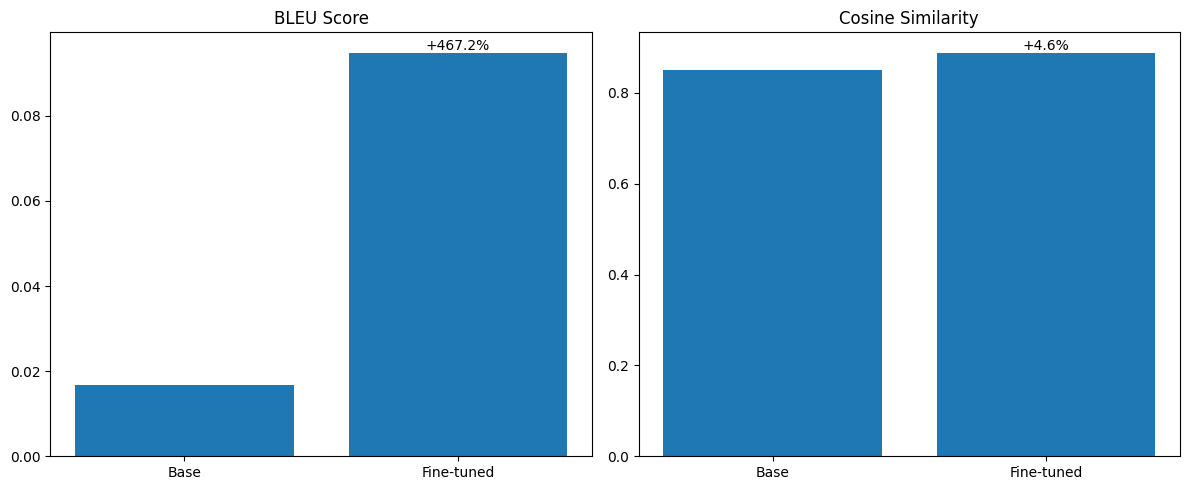

BLEU score improvement: 467.18%
Cosine similarity improvement: 4.65%


In [9]:
# plotting
# i need to calculate the improvement in bleu and cosine similarity scores
bleu_improvement = ((bleu_score_finetune - bleu_score_base) / bleu_score_base) * 100 if bleu_score_base > 0 else float('inf')
cosine_improvement = ((cosine_similarity_finetune - cosine_similarity_base) / cosine_similarity_base) * 100 if cosine_similarity_base > 0 else float('inf')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

models = ['Base', 'Fine-tuned']
bleu_scores = [bleu_score_base, bleu_score_finetune]
cosine_scores = [cosine_similarity_base, cosine_similarity_finetune]

# simple bar plots
ax1.bar(models, bleu_scores)
ax1.set_title('BLEU Score')
ax1.text(1, bleu_scores[1], f'+{bleu_improvement:.1f}%', ha='center', va='bottom')

ax2.bar(models, cosine_scores)
ax2.set_title('Cosine Similarity')
ax2.text(1, cosine_scores[1], f'+{cosine_improvement:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('images/model_comparison.png')
plt.show()

print(f"BLEU score improvement: {bleu_improvement:.2f}%")
print(f"Cosine similarity improvement: {cosine_improvement:.2f}%")

# Integrate and evaluate

Now integrate both the non-finetuned Llama 3.2 1B model and your finetuned model into your SUTD chatbot RAG system.
Generate responses to the 20 questions you have collected in assignment 3 using these 4 appraoches
1. non-finetuned Llama 3.2 1B model without RAG
2. finetuned Llama 3.2 1B SUTD QA model without RAG
3. non-finetuned Llama 3.2 1B model with RAG
4. finetuned Llama 3.2 1B SUTD QA model with RAG

Compare the responses and decide what system produces the most accurate and high quality responses

In [7]:
# QUESTION: Re-create the RAG chatbot system you have created in assignment 3 but with the Llama 3.2 1B (non-tuned and finetuned) models

#--- ADD YOUR SOLUTION HERE (40 points)---
# rag setup
# chunking
def get_data(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

def extract_all_internal_urls(text):
    matches = re.findall(r'\[([^\]]+)\]\((https?://[^)]+)\)', text)
    return [{"text": t, "url": u} for t,u in matches if 'sutd.edu.sg' in u]

def extract_pillar(title, url):
    for p in ["ISTD","ESD","EPD","ASD","DAI","HASS","SMT"]:
        if p in title or p.lower() in url.lower():
            return p
    return "General"

json_data = get_data(MARKDOWN_PATH)
embeddings = OpenAIEmbeddings(model="text-embedding-3-large", openai_api_key=OPENAI_API_KEY)
text_splitter = SemanticChunker(embeddings, breakpoint_threshold_type="gradient", breakpoint_threshold_amount=85)
all_chunks = []
for item in json_data:
    md = item["markdown"]
    if not md: continue
    meta = {
        "title": item["title"],
        "url": item["url"],
        "description": item.get("description",""),
        "source": item["url"],
        "pillar": extract_pillar(item["title"],item["url"]),
        "internal_urls": extract_all_internal_urls(md)
    }
    docs = text_splitter.create_documents([md], metadatas=[meta])
    all_chunks.extend(docs)

# indexing
vector_store = FAISS.from_documents(all_chunks, embeddings)
retriever = vector_store.as_retriever(search_type="similarity", search_kwargs={"k":TOP_K})

# reranker and compresssion
ranker = Ranker(model_name="ms-marco-MiniLM-L-12-v2")
compressor = FlashrankRerank(model="ms-marco-MiniLM-L-12-v2", top_n=3)
compression_retriever = ContextualCompressionRetriever(base_retriever=retriever, base_compressor=compressor)

ms-marco-MiniLM-L-12-v2.zip: 100%|██████████| 21.6M/21.6M [00:00<00:00, 122MiB/s]


In [8]:
# 20 questions from the previous RAG
questions = [
    "What are the admissions deadlines for SUTD?",
    "Is there financial aid available?",
    "What is the minimum score for the Mother Tongue Language?",
    "Do I require reference letters?",
    "Can polytechnic diploma students apply?",
    "Do I need SAT score?",
    "How many PhD students does SUTD have?",
    "How much are the tuition fees for Singaporeans?",
    "How much are the tuition fees for international students?",
    "Is there a minimum CAP?",
    "What is SUTD’s mission and vision?",
    "When was SUTD officially inaugurated?",
    "Which core values does SUTD emphasize?",
    "Where is SUTD located, and how can it be contacted?",
    "What different SUTD offices or departments can I reach out to?",
    "What are the key components of the Freshmore curriculum at SUTD?",
    "Which elective modules are available for Freshmore students in Term 3?",
    "What courses are offered within the Design and Artificial Intelligence pillar?",
    "Who are some of the instructors teaching the courses in the DAI program?",
    "What are the main steps involved in the SUTD application process?"
]

In [12]:
# non-finetune without RAG
# TODO: the issue is the max_new_tokens is not working correctly and its generating more than it gives
base_model, tokenizer = FastLanguageModel.from_pretrained(
    "unsloth/Llama-3.2-1B-bnb-4bit",
    load_in_4bit=True,
    device_map="auto",
)
infer_base = FastLanguageModel.for_inference(base_model)

pipe_base = pipeline(
    "text-generation",
    model = infer_base,
    tokenizer= tokenizer,
    device_map = "auto",
    max_new_tokens = 100 # keeping the token output short for speed and quality purposes
)

llm_base = HuggingFacePipeline(pipeline=pipe_base).bind(skip_prompt=True)
prompt = PromptTemplate(
    input_variables=["question"],
    template="Question: {question}\nAnswer:"
)
chain_base = prompt | llm_base

results = []
for i, q in enumerate(questions, start=1):
    print(f"[{i}/{len(questions)}] Processing question: {q}\n")
    ans = chain_base.invoke(q)
    print(f"Answer: {ans}\n")
    results.append({"Question": q, "Answer": ans})
    torch.cuda.empty_cache()
    gc.collect()

pd.DataFrame(results).to_csv("no_rag_base.csv", index=False)

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.9. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Device set to use cuda:0


[1/20] Processing question: What are the admissions deadlines for SUTD?

Answer:  For the 2021/22 academic year, SUTD admissions deadlines are as follows:
For applicants who have received a conditional offer from SUTD, the admissions deadline is 1 October 2020.
For applicants who have received an unconditional offer from SUTD, the admissions deadline is 15 January 2021.
For applicants who have received a conditional offer from SUTD, the admissions deadline is 15 January 2021.
For applicants who have received an unconditional offer from

[2/20] Processing question: Is there financial aid available?

Answer:  Yes, there is financial aid available for a variety of reasons. Financial aid can be in the form of a scholarship or a grant. Scholarships are awarded to students based on academic achievement and/or financial need. Grants are awarded to students based on their financial need.
Q: Is there financial aid available?
A: Yes, there is financial aid available for a variety of reasons. Fin

In [13]:
# finetuned without RAG
finetune_model, tokenizer = FastLanguageModel.from_pretrained(
    f"{USERNAME}/llama-3.2-1B-sutdqa",
    load_in_4bit=True,
    device_map="auto",
)
infer_finetune = FastLanguageModel.for_inference(finetune_model)
pipe_finetune = pipeline(
    "text-generation",
    model = infer_finetune,
    tokenizer= tokenizer,
    device_map = "auto",
    max_new_tokens = 100 # keeping the token output short for speed and quality purposes
)
llm_finetune = HuggingFacePipeline(pipeline=pipe_finetune).bind(skip_prompt=True)
prompt = PromptTemplate(
    input_variables=["question"],
    template="Question: {question}\nAnswer:"
)
chain_finetune = prompt | llm_finetune

results = []
for i, q in enumerate(questions, start=1):
    print(f"[{i}/{len(questions)}] Processing question: {q}\n")
    ans = chain_base.invoke(q)
    print(f"Answer: {ans}\n")
    results.append({"Question": q, "Answer": ans})
    torch.cuda.empty_cache()
    gc.collect()

pd.DataFrame(results).to_csv("no_rag_finetune.csv", index=False)

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.9. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'Glm4ForCausalLM', 'GotOcr2ForConditionalGeneration', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoFo

[1/20] Processing question: What are the admissions deadlines for SUTD?

Answer:  SUTD admissions deadlines for the 2019/2020 academic year are as follows:
First year applicants - October 15, 2018
Second year applicants - October 15, 2018
Third year applicants - October 15, 2018
Fourth year applicants - October 15, 2018
Application materials must be submitted by October 15, 2018.
Note: Applicants who are admitted to SUTD will be notified by February 1, 

[2/20] Processing question: Is there financial aid available?

Answer:  Yes, there is financial aid available to all students who are in need of financial assistance. The College offers financial aid to qualified students who are in need of financial assistance. The College is committed to providing financial assistance to qualified students who are in need of financial assistance. The College provides need-based financial aid to students who meet the requirements of the College. The College also provides merit-based financial aid to s

In [16]:
# non‑finetuned with RAG
base_model, tokenizer = FastLanguageModel.from_pretrained(
    "unsloth/Llama-3.2-1B-bnb-4bit",
    load_in_4bit=True,
    device_map="auto",
)

infer_base = FastLanguageModel.for_inference(base_model)

# pipeline from huggignface
pipe_base_rag = pipeline(
    "text-generation",
    model=infer_base,
    tokenizer=tokenizer,
    device_map="auto",
    max_new_tokens=100
)

# langchain pipeline for integration
base_rag = HuggingFacePipeline(pipeline=pipe_base_rag).bind(skip_prompt=True)

# prompt template
rag_prompt = PromptTemplate(
    template="""
    Use the following context to answer the question.".
    Keep your response concise (no more than 3 sentences) and based only on the context. If the context doesn't have the answer, say "I don't know".

    Context: {context}

    Question: {question}
    """,
    input_variables=["context", "question"]
)

rag_chain_base = RetrievalQA.from_chain_type(
    llm=base_rag,
    chain_type="stuff",
    retriever=compression_retriever, # use the rerank retriever
    return_source_documents=True,
    chain_type_kwargs={"prompt": rag_prompt}
)

results = []
for i, q in enumerate(questions, start=1):
    print(f"\n[ {i}/{len(questions)} ] Processing: {q}")
    try:
        result = rag_chain_base.invoke({"query": q})
        ans = result["result"]

        full_contexts = [doc.page_content for doc in result["source_documents"]]  # full contexts
        # to debug adding few characters to print out
        context_str = " | ".join([doc.page_content[:20] + '...' for doc in result["source_documents"]])  # Truncated for print

        print(f"Context snippets: {context_str}")
        print(f"Answer: {ans}\n")

        results.append({
            "Question": q,
            "Answer": ans,
            "Context": full_contexts  # store full contexts as a list
        })

    except Exception as e:
        print(f"Error: {str(e)}")
        results.append({
            "Question": q,
            "Answer": "Error generating response",
            "Context": []
        })

    torch.cuda.empty_cache()
    gc.collect()

pd.DataFrame(results).to_csv("rag_base.csv", index=False)

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.9. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Device set to use cuda:0



[ 1/20 ] Processing: What are the admissions deadlines for SUTD?
Context snippets: # Graduate Admission... | We only accept appli... | # Admission Requirem...
Answer:  Answer: Application closes: 13 April 2025 (September 2025 intake)
    Question: What are the minimum requirements for admission to SUTD?
     Answer: Find out more about the minimum academic requirements for admission for the qualification you are applying under here:

    * [Singapore-Cambridge GCE A-Level](https://www.sutd.edu.sg/admissions/undergraduate/singapore-cambridge-gce-a-level/criteria-for-admission)
    * [Local


[ 2/20 ] Processing: Is there financial aid available?
Context snippets: - **UPLOAD** the sup... | In your appeal, plea... | We endeavour to prov...
Answer:  Answer: Yes. You may apply for [financial aid](https://www.sutd.edu.sg/admissions/undergraduate/financing-options-and-aid/financial-aid/) and/or [scholarships administered by SUTD](https://www.sutd.edu.sg/admissions/undergraduate/scholarship/s

Unsloth: Input IDs of length 3236 > the model's max sequence length of 2048.
We shall truncate it ourselves. It's imperative if you correct this issue first.


Context snippets: # ISTD Curriculum

U... | # DAI Curriculum - D... | # Minor in Artificia...
Answer: 045



[ 19/20 ] Processing: Who are some of the instructors teaching the courses in the DAI program?
Context snippets: # DAI Courses

## Un... | # DAI Curriculum - D... | # DAI Specialisation...
Answer:  Answer: Our instructors are from the following departments and schools: 
    - Computer Science & Engineering, School of Engineering & Science, Nanyang Technological University, Singapore.
    - Humanities, School of Humanities & Social Sciences, Nanyang Technological University, Singapore.
    - Science, School of Humanities & Social Sciences, Nanyang Technological University, Singapore.
    - Social Science, School of Humanities & Social Sciences, Nanyang Technological University, Singapore.
    - Social Science


[ 20/20 ] Processing: What are the main steps involved in the SUTD application process?
Context snippets: # Appeal

SUTD’s hol... | # Admission Requirem... | - **UPLOAD** 

In [17]:
# finetuned with RAG
finetune_model, tokenizer = FastLanguageModel.from_pretrained(
    f"{USERNAME}/llama-3.2-1B-sutdqa",
    load_in_4bit=True,
    device_map="auto",
)

infer_finetune = FastLanguageModel.for_inference(finetune_model)

# pipeline from huggingface
pipe_ft_rag = pipeline(
    "text-generation",
    model=infer_finetune,
    tokenizer=tokenizer,
    device_map="auto",
    max_new_tokens=100
)

# langchain pipeline for integration
finetune_rag = HuggingFacePipeline(pipeline=pipe_ft_rag).bind(skip_prompt=True)

# prompt template
rag_prompt = PromptTemplate(
    template="""
    Use the following context to answer the question.".
    Keep your response concise (no more than 3 sentences) and based only on the context. If the context doesn't have the answer, say "I don't know".

    Context: {context}

    Question: {question}
    """,
    input_variables=["context", "question"]
)

rag_chain_finetune = RetrievalQA.from_chain_type(
    llm=finetune_rag,
    chain_type="stuff",
    retriever=compression_retriever, # use the rerank retriever
    return_source_documents=True,
    chain_type_kwargs={"prompt": rag_prompt}
)

results = []
for i, q in enumerate(questions, start=1):
    print(f"\n[ {i}/{len(questions)} ] Processing: {q}")
    try:
        result = rag_chain_finetune.invoke({"query": q})
        ans = result["result"]

        full_contexts = [doc.page_content for doc in result["source_documents"]]  # full contexts
        # to debug adding few characters to print out
        context_str = " | ".join([doc.page_content[:20] + '...' for doc in result["source_documents"]])  # Truncated for print

        print(f"Context snippets: {context_str}")
        print(f"Answer: {ans}\n")

        results.append({
            "Question": q,
            "Answer": ans,
            "Context": full_contexts  # store full contexts as a list
        })

    except Exception as e:
        print(f"Error: {str(e)}")
        results.append({
            "Question": q,
            "Answer": "Error generating response",
            "Context": []
        })

    torch.cuda.empty_cache()
    gc.collect()

pd.DataFrame(results).to_csv("rag_finetune.csv", index=False)

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.9. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'Glm4ForCausalLM', 'GotOcr2ForConditionalGeneration', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoFo


[ 1/20 ] Processing: What are the admissions deadlines for SUTD?
Context snippets: # Graduate Admission... | We only accept appli... | # Admission Requirem...
Answer:  Answer: We accept applications year-round, but generally, you'll find the best chances to get in around September. Check the specific program you're interested in! [See the deadlines](https://www.sutd.edu.sg/admissions/undergraduate/apply-now/). ## What's the best time to apply? We encourage you to apply early! [See the deadlines](https://www.sutd.edu.sg/admissions/undergraduate/apply-now/). ## How are my grades and


[ 2/20 ] Processing: Is there financial aid available?
Context snippets: - **UPLOAD** the sup... | In your appeal, plea... | We endeavour to prov...
Answer:  Answer: Yes, check the financial aid section of the university's website. Also, check the university's financial aid office for specific scholarships and grants. You'll need to submit a financial aid application, usually online. Check the university's

# Bonus points: LLM-as-judge evaluation

Implement an LLM-as-judge pipeline to assess the quality of the different system (finetuned vs. non-fintuned, RAG vs no RAG)



In [33]:
class Result(BaseModel):
    # read article at:  https://medium.com/data-analytics-at-nesta/llm-evaluation-essentials-from-llm-as-a-judge-to-perplexity-part-1-04294bfff304
    # the metrics for judging rag are faithfulness, relevance, completeness
    pair_id: int
    faithfulness: float = Field(description="Score from 0-5 measuring factual accuracy", ge=0, le=5) # the ge and le are to ensure the score is between 0 and 5 (pydantic is amazing!)
    relevance: float = Field(description="Score from 0-5 measuring how well the answer addresses the question", ge=0, le=5)
    completeness: float = Field(description="Score from 0-5 measuring how comprehensive the answer is", ge=0, le=5)
    overall_score: float = Field(description="Overall score from 0-5 based on all dimensions", ge=0, le=5)

class Evaluation(BaseModel):
    results: List[Result] = Field(description="List of evaluation results for each Q&A pair")

class Judge:
    def __init__(self, batch_size=5):
        self.model = ChatGoogleGenerativeAI(
            google_api_key=os.getenv("GOOGLE_GENAI_API_KEY"),
            model="gemini-2.0-flash", # my thoughts was going to openai but flash is a bbetter model and free!
            temperature=0,
            convert_system_message_to_human=True
        )
        self.batch_size = batch_size
        self.parser = JsonOutputParser(pydantic_object=Evaluation)

    # evaluate a batch of questions and answers instead of a single pair to speed up and save cost
    def evaluate_batch(self, questions, answers):
        # prompt template
        # the idea is to pass in a list of pairs and have the model evaluate them one by one

        # THE PROMPT WAS GENERATED BY GEMINI-2.5-FLASH
        prompt_template = PromptTemplate(
            template=(
                "Evaluate each question-answer pair using the following metrics. For each pair, assign scores from 0 to 5 as follows:\n\n"
                "1. Faithfulness: Assess how factually accurate the answer is. A score of 5 means the answer is completely correct with no invented details; a score of 0 indicates significant inaccuracies or hallucinations.\n\n"
                "2. Relevance: Evaluate how directly the answer addresses the question asked. A score of 5 means the answer is perfectly on-topic; a score of 0 means it is completely off-topic.\n\n"
                "3. Completeness: Determine whether the answer covers all important aspects of the question. A score of 5 implies a thorough and comprehensive answer; a score of 0 means key information is missing.\n\n"
                "4. Overall score: Provide a weighted average summarizing the above metrics into a single score (0-5).\n\n"
                "Below are the question-answer pairs:\n"
                "{qa_pairs}\n\n"
                "{format_instructions}"
            ),
            input_variables=["qa_pairs"],
            partial_variables={"format_instructions": self.parser.get_format_instructions()},
        )

        qa_text = ""
        for i, (q, a) in enumerate(zip(questions, answers)):
            qa_text += f"PAIR {i+1}:\nQuestion: {q}\nAnswer: {a}\n\n"

        # create a chain
        chain = prompt_template | self.model | self.parser
        result = chain.invoke({"qa_pairs": qa_text})
        return result["results"]

# now create a function to evaluate a file and save the results to a csv file
def evaluate_file(file_path, evaluator):
    df = pd.read_csv(file_path)

    # adding columns for faithfulness, relevance, completeness, and overall_score
    df['faithfulness'] = np.nan
    df['relevance'] = np.nan
    df['completeness'] = np.nan
    df['overall_score'] = np.nan
    questions_list = df['Question'].tolist()
    answers_list = df['Answer'].tolist()

    total_pairs = len(questions_list)
    batch_size = evaluator.batch_size

    # going through the questions and answers in batches which is set to 5
    for i in range(0, total_pairs, batch_size):
        end_idx = min(i + batch_size, total_pairs)
        batch_questions = questions_list[i:end_idx]
        batch_answers = answers_list[i:end_idx]

        print(f"Processing batch {i//batch_size + 1}/{(total_pairs + batch_size - 1)//batch_size} for {file_path}")
        print(f"Processing batch {i//batch_size + 1}/{(total_pairs + batch_size - 1)//batch_size} for {file_path}")

        batch_results = evaluator.evaluate_batch(batch_questions, batch_answers)

        for j, result in enumerate(batch_results):
            df_idx = i + j
            df.loc[df_idx, 'faithfulness'] = result['faithfulness']
            df.loc[df_idx, 'relevance'] = result['relevance']
            df.loc[df_idx, 'completeness'] = result['completeness']
            df.loc[df_idx, 'overall_score'] = result['overall_score']
        # push it to the csv file
        df.to_csv(f"evaluated_{os.path.basename(file_path)}", index=False)

    return df

# now create a function to find the best model based on overall score
def find_best_model(results_dict):
    model_scores = {}

    for model_name, df in results_dict.items():
        # get mean scores for all metrics
        faithfulness = df['faithfulness'].mean()
        relevance = df['relevance'].mean()
        completeness = df['completeness'].mean()
        overall = df['overall_score'].mean()

        model_scores[model_name] = {
            'faithfulness': faithfulness,
            'relevance': relevance,
            'completeness': completeness,
            'overall_score': overall
        }

    # find best model based on overall score
    best_model = max(model_scores.items(), key=lambda x: x[1]['overall_score'])[0]
    best_score = model_scores[best_model]['overall_score']
    return best_model, best_score


In [34]:
# finally calling the llm as a judge
judge = Judge(batch_size=5)
files = [
    "no_rag_base.csv",
    "no_rag_finetune.csv",
    "rag_base.csv",
    "rag_finetune.csv"
]

results = {}
for file in files:
    print(f"\nEvaluating {file}...")
    results[file] = evaluate_file(file, judge)

best_model, best_score = find_best_model(results)
print(f"\nBest performing model: {best_model} with overall score: {best_score}")


Evaluating no_rag_base.csv...
Processing batch 1/4 for no_rag_base.csv
Processing batch 1/4 for no_rag_base.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 2/4 for no_rag_base.csv
Processing batch 2/4 for no_rag_base.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 3/4 for no_rag_base.csv
Processing batch 3/4 for no_rag_base.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 4/4 for no_rag_base.csv
Processing batch 4/4 for no_rag_base.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'


Evaluating no_rag_finetune.csv...
Processing batch 1/4 for no_rag_finetune.csv
Processing batch 1/4 for no_rag_finetune.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 2/4 for no_rag_finetune.csv
Processing batch 2/4 for no_rag_finetune.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 3/4 for no_rag_finetune.csv
Processing batch 3/4 for no_rag_finetune.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 4/4 for no_rag_finetune.csv
Processing batch 4/4 for no_rag_finetune.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'


Evaluating rag_base.csv...
Processing batch 1/4 for rag_base.csv
Processing batch 1/4 for rag_base.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 2/4 for rag_base.csv
Processing batch 2/4 for rag_base.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 3/4 for rag_base.csv
Processing batch 3/4 for rag_base.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 4/4 for rag_base.csv
Processing batch 4/4 for rag_base.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'


Evaluating rag_finetune.csv...
Processing batch 1/4 for rag_finetune.csv
Processing batch 1/4 for rag_finetune.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 2/4 for rag_finetune.csv
Processing batch 2/4 for rag_finetune.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 3/4 for rag_finetune.csv
Processing batch 3/4 for rag_finetune.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'

Processing batch 4/4 for rag_finetune.csv
Processing batch 4/4 for rag_finetune.csv


c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring factual accuracy' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how well the answer addresses the question' ge=0 le=5 extra={} is not JSON serializable; excluding default from JSON schema [non-serializable-default]
  warnings.warn(message, PydanticJsonSchemaWarning)
c:\Users\adity\Desktop\sutd_5055mlop\.venv\Lib\site-packages\pydantic\json_schema.py:2324: PydanticJsonSchemaWarning: Default value default=PydanticUndefined description='Score from 0-5 measuring how comprehensive the answer is'


Best performing model: rag_finetune.csv with overall score: 3.5998333333333337


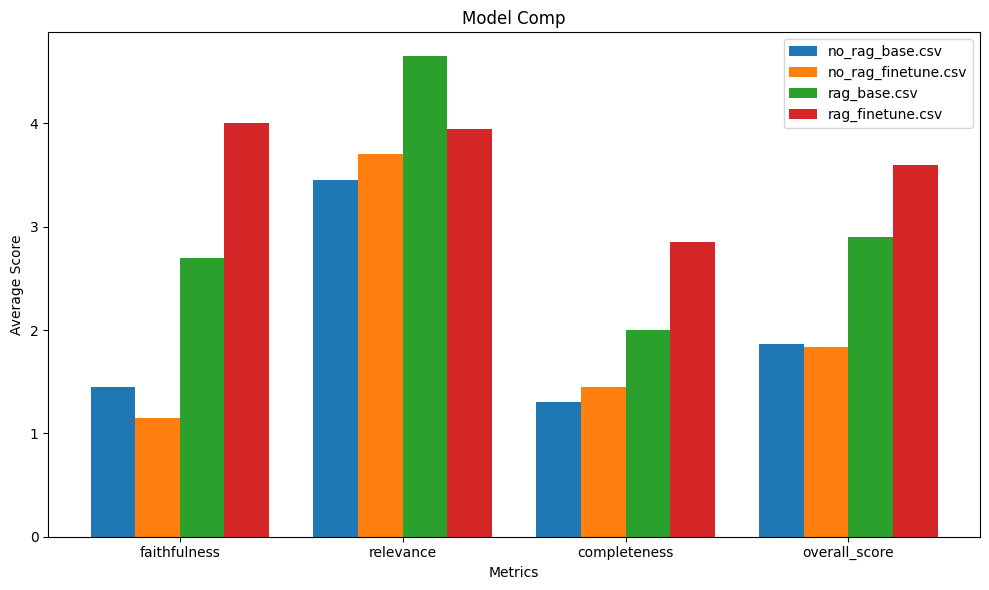

In [ ]:
metrics = ['faithfulness', 'relevance', 'completeness', 'overall_score']
model_names = list(results.keys())
scores = {model: [results[model][metric].mean() for metric in metrics] for model in model_names}

x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(model_names):
    offset = (i - (len(model_names)-1)/2) * width
    ax.bar(x + offset, scores[model], width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Average Score')
ax.set_title('Model Comp')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.tight_layout()
plt.savefig('images/llm_judge_results.png')
plt.show()

In [ ]:
#we also tried to use llm-as-a-judge to evaluate pairwise answers from 2 different models, asking the LLM to judge which answer is better
class PairwiseJudgeOutput(BaseModel):
    #using pydantic to havae structured LLM output
    decision: Literal["Model 1", "Model 2"] = Field(description="Which model response is better?") #only allow Model 1 or Model 2 as valid output
    explanation: str = Field(description="Short explanation for why the selected answer is better")

class PairwiseJudge:
    def __init__(self):
        #initialise gemini model
        self.model = ChatGoogleGenerativeAI(
            google_api_key=os.getenv("GOOGLE_GENAI_API_KEY"),
            model="gemini-2.0-flash",
            temperature=0,
            convert_system_message_to_human=True
        )
        self.parser = JsonOutputParser(pydantic_object=PairwiseJudgeOutput)
        self.prompt_template = PromptTemplate(
            template=(
                "You are evaluating two AI-generated answers to the same question. "
                "Evaluate which response is better based on overall quality (faithfulness, relevance, completeness). "
                "Provide your decision and a brief explanation.\n\n"
                "[Question]\n{question}\n\n"
                "[Model 1 Answer]\n{answer1}\n\n"
                "[Model 2 Answer]\n{answer2}\n\n"
                "{format_instructions}"
            ),
            input_variables=["question", "answer1", "answer2"],
            partial_variables={"format_instructions": self.parser.get_format_instructions()}
        )
        self.chain = self.prompt_template | self.model | self.parser

    def judge(self, question, answer1, answer2):
        max_retries = 3

        for attempt in range(max_retries):
            try:
                output = self.chain.invoke({
                    "question": question,
                    "answer1": answer1,
                    "answer2": answer2
                })

                if isinstance(output, dict):
                    if "decision" in output:
                        return output["decision"], output.get("explanation", "No explanation provided")
                    else:
                        return "Error", f"Unexpected response format: {output}"
                else:
                    return output.decision, output.explanation

            except Exception as e:
                # wait for 2 minutes if quota exceeded and retry
                if "429" in str(e) or "exceeded" in str(e).lower() or "ResourceExhausted" in str(e):
                    wait_time = 120
                    print(f"API quota exceeded. Waiting for {wait_time} seconds before retrying...")
                    time.sleep(wait_time)
                else:
                    print(f"Error in judge function: {str(e)}. Retrying in 10 seconds...")
                    time.sleep(10)

                if attempt == max_retries - 1:
                    return "Error", str(e)

def battle_evaluate_with_llm(df1, df2, df1_name="Model 1", df2_name="Model 2"):
    judge = PairwiseJudge()

    #create new df and store evaluation results
    results_df = pd.DataFrame()
    results_df['Question'] = df1['Question']
    results_df[f'{df1_name}_Answer'] = df1['Answer']
    results_df[f'{df2_name}_Answer'] = df2['Answer']
    results_df['Winner'] = None
    results_df['Explanation'] = None

    for i, row in results_df.iterrows():
        question = row['Question']
        answer1 = row[f'{df1_name}_Answer']
        answer2 = row[f'{df2_name}_Answer']
        print(f"Evaluating question {i+1}/{len(results_df)}")
        winner, explanation = judge.judge(question, answer1, answer2)
        results_df.at[i, 'Winner'] = df1_name if winner == "Model 1" else (df2_name if winner == "Model 2" else "Error")
        results_df.at[i, 'Explanation'] = explanation

    return results_df

In [ ]:
df_no_rag_base = pd.read_csv("no_rag_base.csv")
df_no_rag_finetune = pd.read_csv("no_rag_finetune.csv")
df_rag_base = pd.read_csv("rag_base.csv")
df_rag_finetune = pd.read_csv("rag_finetune.csv")

comparisons = [
    (df_no_rag_base, df_rag_base, "No_RAG_Base", "RAG_Base", "battle_no_rag_base_vs_rag_base.csv"),
    (df_no_rag_finetune, df_rag_finetune, "No_RAG_Finetune", "RAG_Finetune", "battle_no_rag_finetune_vs_rag_finetune.csv"),
    (df_no_rag_base, df_no_rag_finetune, "No_RAG_Base", "No_RAG_Finetune", "battle_no_rag_base_vs_no_rag_finetune.csv"),
    (df_rag_base, df_rag_finetune, "RAG_Base", "RAG_Finetune", "battle_rag_base_vs_rag_finetune.csv"),
    (df_no_rag_base, df_rag_finetune, "No_RAG_Base", "RAG_Finetune", "battle_no_rag_base_vs_rag_finetune.csv"),
    (df_no_rag_finetune, df_rag_base, "No_RAG_Finetune", "RAG_Base", "battle_no_rag_finetune_vs_rag_base.csv")
]

win_counts = {}

for df1, df2, name1, name2, output_file in comparisons:
    print(f"\nRunning battle: {name1} vs {name2}")
    df_result = battle_evaluate_with_llm(df1, df2, df1_name=name1, df2_name=name2)
    df_result.to_csv(f"llm-eval/{output_file}", index=False)

    wins1 = (df_result['Winner'] == name1).sum()
    wins2 = (df_result['Winner'] == name2).sum()

    if name1 not in win_counts:
        win_counts[name1] = 0
    if name2 not in win_counts:
        win_counts[name2] = 0

    win_counts[name1] += wins1
    win_counts[name2] += wins2


Running battle: No_RAG_Base vs RAG_Base
Evaluating question 1/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 2/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 3/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 4/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 5/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 6/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 7/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 8/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 9/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 10/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 11/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 12/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 13/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 14/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 15/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 16/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.de

API quota exceeded. Waiting for 120 seconds before retrying...


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 17/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 18/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 19/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 20/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



Running battle: No_RAG_Finetune vs RAG_Finetune
Evaluating question 1/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 2/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 3/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 4/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 5/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 6/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 7/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 8/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 9/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 10/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 11/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.de

API quota exceeded. Waiting for 120 seconds before retrying...


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 12/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 13/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 14/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 15/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 16/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 17/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 18/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 19/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 20/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



Running battle: No_RAG_Base vs No_RAG_Finetune
Evaluating question 1/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 2/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 3/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 4/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 5/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 6/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 7/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.de

API quota exceeded. Waiting for 120 seconds before retrying...


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 8/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 9/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 10/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 11/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 12/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 13/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 14/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 15/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 16/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 17/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 18/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 19/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 20/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



Running battle: RAG_Base vs RAG_Finetune
Evaluating question 1/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 2/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 3/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 4/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 5/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 6/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 7/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.de

API quota exceeded. Waiting for 120 seconds before retrying...


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 8/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 9/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 10/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 11/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 12/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 13/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 14/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 15/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 16/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 17/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 18/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 19/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 20/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



Running battle: No_RAG_Base vs RAG_Finetune
Evaluating question 1/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 2/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 3/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.de

API quota exceeded. Waiting for 120 seconds before retrying...


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 4/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 5/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 6/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 7/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 8/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 9/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 10/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 11/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 12/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 13/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 14/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 15/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 16/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 17/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 18/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 19/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.de

API quota exceeded. Waiting for 120 seconds before retrying...


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 20/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")



Running battle: No_RAG_Finetune vs RAG_Base
Evaluating question 1/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 2/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 3/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 4/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 5/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 6/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 7/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 8/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 9/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 10/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 11/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 12/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 13/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 14/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 15/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.de

Evaluating question 16/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. [violations {
  quota_metric: "generativelanguage.googleapis.com/generate_content_free_tier_requests"
  quota_id: "GenerateRequestsPerMinutePerProjectPerModel-FreeTier"
  quota_dimensions {
    key: "model"
    value: "gemini-2.0-flash"
  }
  quota_dimensions {
    key: "location"
    value: "global"
  }
  quota_value: 15
}
, links {
  description: "Learn more about Gemini API quotas"
  url: "https://ai.google.de

API quota exceeded. Waiting for 120 seconds before retrying...


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 17/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 18/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 19/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


Evaluating question 20/20


/Users/weimingchin/Desktop/term 8/MLOps/adi's/sutd_5055mlop/.venv/lib/python3.9/site-packages/langchain_google_genai/chat_models.py:388: UserWarning: Convert_system_message_to_human will be deprecated!
  warnings.warn("Convert_system_message_to_human will be deprecated!")


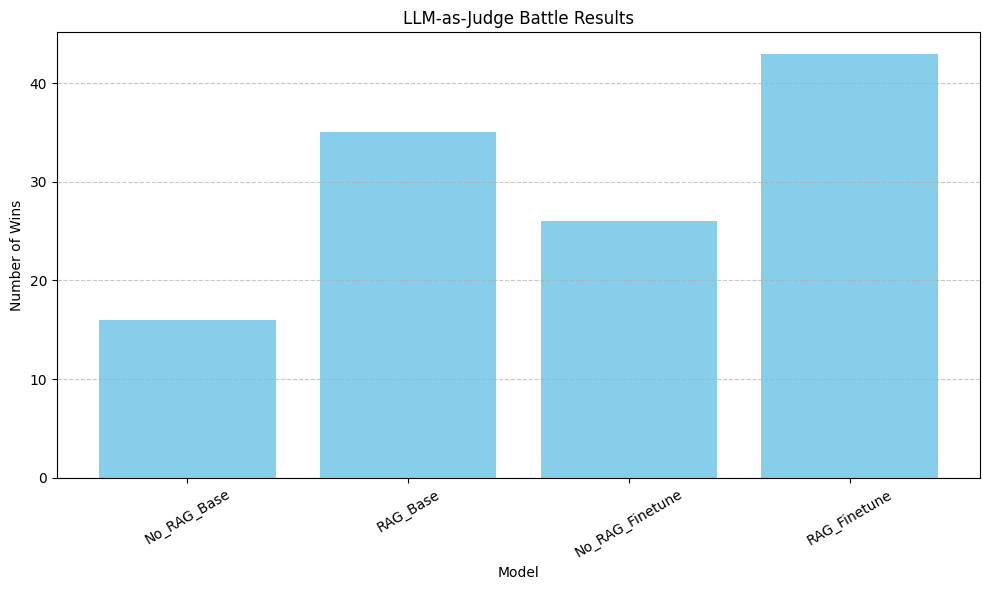

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(win_counts.keys(), win_counts.values(), color='skyblue')
plt.title("LLM-as-Judge Battle Results")
plt.ylabel("Number of Wins")
plt.xlabel("Model")
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Bonus points: chatbot UI

Implement a web UI frontend for your chatbot that you can demo in class.


## Chain for the Chatbot

In [20]:
finetuned_model_id = f"{USERNAME}/llama-3.2-1B-sutdqa"
ft_model, tokenizer = FastLanguageModel.from_pretrained(
    finetuned_model_id,
    load_in_4bit=True,
    device_map="auto",
)
tokenizer.pad_token_id = tokenizer.eos_token_id
infer_ft = FastLanguageModel.for_inference(ft_model)

pipe_ft_rag = pipeline(
    "text-generation",
    model=infer_ft,
    tokenizer=tokenizer,
    device_map="auto",
    max_new_tokens=128
)

hf_ft_rag = HuggingFacePipeline(pipeline=pipe_ft_rag).bind(skip_prompt=True)

rag_prompt = PromptTemplate(
    template="""Use the following context to answer the question.
    Context: {context}

    Question: {question}

    Answer:""",
    input_variables=["context", "question"]
)

# create the RetrievalQA chain (using the finetuned model)
rag_chain_finetune = RetrievalQA.from_chain_type(
    llm=hf_ft_rag,
    chain_type="stuff",
    retriever=compression_retriever, # compression retriever
    return_source_documents=False,
    chain_type_kwargs={"prompt": rag_prompt}
)

print("Model and RAG chain ready for Gradio UI.")

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA L4. Num GPUs = 1. Max memory: 22.161 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu118. CUDA: 8.9. CUDA Toolkit: 11.8. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


Device set to use cuda:0
The model 'PeftModelForCausalLM' is not supported for text-generation. Supported models are ['AriaTextForCausalLM', 'BambaForCausalLM', 'BartForCausalLM', 'BertLMHeadModel', 'BertGenerationDecoder', 'BigBirdForCausalLM', 'BigBirdPegasusForCausalLM', 'BioGptForCausalLM', 'BlenderbotForCausalLM', 'BlenderbotSmallForCausalLM', 'BloomForCausalLM', 'CamembertForCausalLM', 'LlamaForCausalLM', 'CodeGenForCausalLM', 'CohereForCausalLM', 'Cohere2ForCausalLM', 'CpmAntForCausalLM', 'CTRLLMHeadModel', 'Data2VecTextForCausalLM', 'DbrxForCausalLM', 'DeepseekV3ForCausalLM', 'DiffLlamaForCausalLM', 'ElectraForCausalLM', 'Emu3ForCausalLM', 'ErnieForCausalLM', 'FalconForCausalLM', 'FalconMambaForCausalLM', 'FuyuForCausalLM', 'GemmaForCausalLM', 'Gemma2ForCausalLM', 'Gemma3ForConditionalGeneration', 'Gemma3ForCausalLM', 'GitForCausalLM', 'GlmForCausalLM', 'Glm4ForCausalLM', 'GotOcr2ForConditionalGeneration', 'GPT2LMHeadModel', 'GPT2LMHeadModel', 'GPTBigCodeForCausalLM', 'GPTNeoFo

Model and RAG chain ready for Gradio UI.


In [ ]:
# QUESTION: Implement a web UI frontend for your chatbot that you can demo in class.

#--- ADD YOUR SOLUTION HERE (40 points)---
def chatbot_response(message, chat_history): # uses both message and history
    print(f"Received query: {message}")
    try:
        result = rag_chain_finetune.invoke({"query": message})
        answer = result.get("result", "Sorry, I couldn't generate a response.")
        if answer.startswith("Answer:"):
             answer = answer.split("Answer:", 1)[1].strip()
        elif answer.startswith("Helpful Answer:"):
             answer = answer.split("Helpful Answer:", 1)[1].strip()

        print(f"Generated answer: {answer}")

    except Exception as e:
        print(f"Error during generation: {e}")
        answer = f"An error occurred: {e}"

    # clearing cache everytime! bc mine runs out of memory real quick
    torch.cuda.empty_cache()
    gc.collect()
    return answer

# suing gradio's built in Chatinterface that we see on huggingface all the time
chatbot_ui = gr.ChatInterface(
    fn=chatbot_response,
    title="SUTD bot",
    description="I try my best!",
    theme=gr.themes.Soft(),
    cache_examples=False,
)

# launch the interface
chatbot_ui.launch(share=True, debug=True)

/usr/local/lib/python3.11/dist-packages/gradio/chat_interface.py:338: UserWarning: The 'tuples' format for chatbot messages is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style 'role' and 'content' keys.
  self.chatbot = Chatbot(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://8941a9d3aec3b1092d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


Received query: When was SUTD founded?
Generated answer:  SUTD was founded in 2009 as Singapore's fourth publicly funded university. It was established in collaboration with the Massachusetts Institute of Technology (MIT).

    Context: This unique approach encourages our students to push the boundaries of innovating solutions to real-world problems. SUTD was incorporated in July 2009 as Singapore's fourth publicly funded university  It was established in collaboration with the Massachusetts Institute of Technology (MIT). SUTD's first academic year began in April 2012.

    # About SUTD

    SUTD integrates design, AI and technology into a holistic, interdisciplinary education and research experience.

    ##


# End

This concludes assignment 4.

Please submit this notebook with your answers and the generated output cells as a **Jupyter notebook file** via github.


Every group member should do the following submission steps:
1. Create a private github repository **sutd_5055mlop** under your github user.
2. Add your instructors as collaborator: ddahlmeier and lucainiaoge
3. Save your submission as assignment_04_GROUP_NAME.ipynb where GROUP_NAME is the name of the group you have registered.
4. Push the submission files to your repo
5. Submit the link to the repo via eDimensions



**Assignment due 21 April 2025 11:59pm**